# Example querying Prometheus

Prometheus is queried using the http api. 

In [10]:
import time 
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn")

## Prometheus url

In [ ]:
promsrv = "http://localhost:9090"

## Query and store the data into two numpy arrays (ib, ost)

In [52]:
# select time interval
stop = time.time()
start = stop - 60 * 15
#stop = 1530226822.0 + 120 
#start = stop - 200

# Query for psexport infiniband rate 
query = 'irate(node_infiniband_port_data_received_bytes{group="dtn", instance=~"psexport08.*"}[10s])'
payload = {'query': query,
           'start': int(start), 'end': int(stop), 'step': '5s'}
url = "{}/api/v1/query_range".format(promsrv)
r = requests.get(url, params=payload)

data = r.json()
point = data['data']['result'][0]
ib = np.array(point['values'], float).transpose()
ib[1] /= pow(2,20)

#Query OST zpool read rate of ana02, sum all osts 
query_zfs = 'sum(irate(node_zfs_zpool_nread{group="ana02"}[10s]))'
payload = {'query': query_zfs,
           'start': int(start), 'end': int(stop), 'step': '5s' }

url = "{}/api/v1/query_range".format(promsrv)
r = requests.get(url, params=payload)
data = r.json()
point = data['data']['result'][0]
ost = np.array(point['values'], float).transpose()
ost[1] /= pow(2,20)

#for point in res: 
#    #print(point['metric'])
#    #print("   ", point['values'])

## Plotting

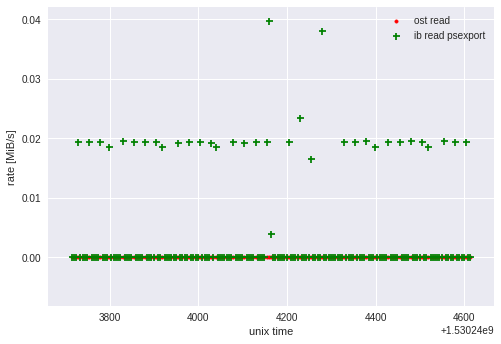

In [53]:
plt.scatter(ost[0], ost[1], marker='.', c='r', label="ost read")
plt.scatter(ib[0], ib[1], marker='+', c='g', label="ib read psexport")
plt.xlabel("unix time")
plt.ylabel("rate [MiB/s]")
plt.legend()
plt.show()